In [1]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
from networks.networks import ExampleNet
from solver import Solver, load_solver
import data_visualization
import data_loader

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

Files already downloaded and verified
Files already downloaded and verified


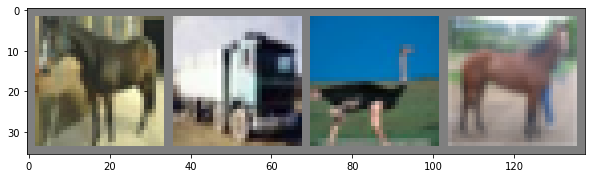

     horse    truck     bird    horse


In [4]:
batch_size = 4
subset_size = 120
random_labels = False
#trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=4, subset_indices=subset_indices)

trainloader = data_loader.get_CIFAR10_trainset_loader(batch_size=batch_size, subset_size=subset_size, random_labels=random_labels)
testloader = data_loader.get_CIFAR10_testset_loader(batch_size=batch_size, subset_size=subset_size)

classes = data_loader.get_CIFAR10_classes()

data_visualization.show_samples(trainloader, classes)

In [5]:
net = ExampleNet()
# net = models.vgg16(pretrained=False)

# testloader=None
solver = Solver(net, trainloader, validationloader=testloader, optim = 'adam')

In [6]:
solver.train(num_epochs=10, log_every=4, plot=True, verbose=False)

Loading BokehJS ...

In [7]:
solver.save_solver()

In [8]:
solver.save_best_solver()

In [9]:
loaded_solver = load_solver()
loaded_solver.print_bokeh_plots()
loaded_solver.print_log()

Loading BokehJS ...

Loading BokehJS ...

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    1,         4]    2.30981469 |        0.06250000
[    1,         8]    2.30776751 |        0.12500000
[    1,        12]    2.28411347 |        0.18750000
[    1,        16]    2.33112788 |        0.06250000
[    1,        20]    2.31099564 |        0.00000000
[    1,        24]    2.26317799 |        0.12500000
[    1,        28]    2.35265857 |        0.00000000
----------------------------------------------------
[    1,  finished]     accuracy: |        0.10833333

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    2,         4]    2.28716826 |        0.18750000
[    2,         8]    2.29885864 |        0.06250000
[    2,        12]    2.22199720 |        0.12500000
[    2,        16]    2.32774079 |        0.06250000
[    2,        20]    2.21191233 |        0.12500000
[    2,        24]    2.33338892 |        0.1

In [10]:
best_solver = load_solver("best.pth")
best_solver.print_bokeh_plots()
best_solver.print_log()

Loading BokehJS ...

Loading BokehJS ...

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    1,         4]    2.30981469 |        0.06250000
[    1,         8]    2.30776751 |        0.12500000
[    1,        12]    2.28411347 |        0.18750000
[    1,        16]    2.33112788 |        0.06250000
[    1,        20]    2.31099564 |        0.00000000
[    1,        24]    2.26317799 |        0.12500000
[    1,        28]    2.35265857 |        0.00000000
----------------------------------------------------
[    1,  finished]     accuracy: |        0.10833333

[epoch, iteration] training loss | training accuracy
----------------------------------------------------
[    2,         4]    2.28716826 |        0.18750000
[    2,         8]    2.29885864 |        0.06250000
[    2,        12]    2.22199720 |        0.12500000
[    2,        16]    2.32774079 |        0.06250000
[    2,        20]    2.21191233 |        0.12500000
[    2,        24]    2.33338892 |        0.1